In [1]:
import pandas as pd

In [9]:
data=pd.read_csv(r"C:\Users\vinayak.lakeshri\Documents\dataset\house-prices-advanced-regression-techniques\train.csv")

In [10]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
features=['LotArea','YearBuilt','RoofStyle','BedroomAbvGr','GarageArea','OverallCond','LotFrontage']
target=['SalePrice']

In [12]:
X=data[features]
Y=data[target]

In [13]:
X['Age']=2019-X['YearBuilt']

C:\Users\vinayak.lakeshri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
X.drop('YearBuilt',axis=1,inplace=True)

C:\Users\vinayak.lakeshri\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
X.describe()

,LotArea,BedroomAbvGr,GarageArea,OverallCond,LotFrontage,Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000
mean,10516.828082,2.866438,472.980137,5.575342,70.049958,47.732192
std,9981.264932,0.815778,213.804841,1.112799,24.284752,30.202904
min,1300.000000,0.000000,0.000000,1.000000,21.000000,9.000000
25%,7553.500000,2.000000,334.500000,5.000000,59.000000,19.000000
50%,9478.500000,3.000000,480.000000,5.000000,69.000000,46.000000
75%,11601.500000,3.000000,576.000000,6.000000,80.000000,65.000000
max,215245.000000,8.000000,1418.000000,9.000000,313.000000,147.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

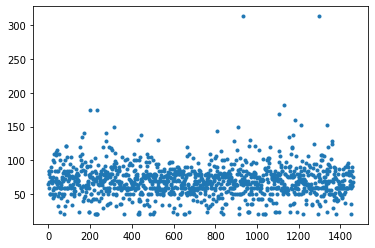

In [17]:
plt.plot(X['LotFrontage'],'.')

In [18]:
X['LotFrontage']=X['LotFrontage'].fillna(70)

C:\Users\vinayak.lakeshri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
X.isna().sum()

LotArea         0
RoofStyle       0
BedroomAbvGr    0
GarageArea      0
OverallCond     0
LotFrontage     0
Age             0
dtype: int64

In [20]:
#Handling Missing Values
#Remove rows/columns
#Replace with mean
#Replace with mode
#Cat to be replaced with mode
#Business logic

In [21]:
X['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [22]:
#Encoding Techniques

    #Label Encoding 
    
    
    #One hot encoding 
    

In [23]:
subset=X[['RoofStyle']]

In [24]:
ohe_values=pd.get_dummies(subset)

In [25]:
X=pd.concat([X,ohe_values],axis=1)

In [26]:
X

,LotArea,RoofStyle,BedroomAbvGr,GarageArea,OverallCond,LotFrontage,Age,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,8450,Gable,3,548,5,65.0,16,0,1,0,0,0,0
1,9600,Gable,3,460,8,80.0,43,0,1,0,0,0,0
2,11250,Gable,3,608,5,68.0,18,0,1,0,0,0,0
3,9550,Gable,3,642,5,60.0,104,0,1,0,0,0,0
4,14260,Gable,4,836,5,84.0,19,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Gable,3,460,5,62.0,20,0,1,0,0,0,0
1456,13175,Gable,3,500,6,85.0,41,0,1,0,0,0,0
1457,9042,Gable,4,252,9,66.0,78,0,1,0,0,0,0
1458,9717,Hip,2,240,6,68.0,69,0,0,0,1,0,0


In [28]:
X.drop(['RoofStyle'],axis=1,inplace=True)

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
seed=1234
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=seed)

In [32]:
len(X)

1460

In [33]:
len(X_train)

1168

In [35]:
len(X_test)

292

In [36]:
#Regression . 


from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()

In [38]:
model=lr.fit(X_train,Y_train)

In [40]:
pred_values=model.predict(X_test)

In [41]:
outcomes=Y_test[:]

In [42]:
outcomes['Pred']=pred_values

C:\Users\vinayak.lakeshri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
outcomes['Pred']=outcomes['Pred'].round()

C:\Users\vinayak.lakeshri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(outcomes['SalePrice'],outcomes['Pred'])

34654.760273972606

In [45]:
data['SalePrice'].mean()

180921.19589041095

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
model=dtr.fit(X_train,Y_train)
pred_values=model.predict(X_test)
mean_absolute_error(Y_test['SalePrice'],pred_values)

34825.00342465754

In [48]:
from sklearn.ensemble import RandomForestRegressor
rtr=RandomForestRegressor()
model=rtr.fit(X_train,Y_train)
pred_values=model.predict(X_test)
mean_absolute_error(Y_test['SalePrice'],pred_values)

C:\Users\vinayak.lakeshri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vinayak.lakeshri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


26934.373401826484

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
LabelEncoder()

LabelEncoder()

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
mean_absolute_error()

TypeError: mean_absolute_error() missing 2 required positional arguments: 'y_true' and 'y_pred'